<center><h1>Optimisation des portefeuilles d'investissement</h1></center>
<center><h3>R√©alis√© par: Chaima Dakhlaoui et Malek Hattab</h3><center>

# Introduction
La Th√©orie du portefeuille ( TP ) est une th√©orie √©conomique qui permet d'expliquer comment les investisseurs peu enclins au risque peuvent construire des portefeuilles pour optimiser (ou maximiser) le rendement attendu en fonction d'un niveau de risque de march√© donn√©. Il a √©t√© formul√© par H. Markowitz et bien qu‚Äôil ne soit pas la seule technique d‚Äôoptimisation connue, il est le plus largement utilis√©.

l'approche de cette discipline suppose que tous les investisseurs sont r√©ticents au risque, c‚Äôest-√†-dire s‚Äôil y a un choix entre les portefeuilles √† faible risque et les portefeuilles √† risque √©lev√© avec les m√™mes rendements, un investisseur en choisira un avec le faible risque.

## 1/ Description du projet:
L'objectif de ce projet est de realiser une application pratique d'optimisation de portefeuille, concretement nous essayerons de construire un profil de portefeuille qui fournir un rendement maximal et un risque minimum √† travers l'analyse moyenne-variance.

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy import stats
from scipy.stats import kurtosistest, skewtest
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [34]:
df = pd.read_excel("C:/Users/Chaima8/Documents/simulation/stocks.xlsx")

### 1/ 1- Description du jeu de donn√©es 
Nous utilisons pour ce projet quatre actions recolt√©s sur yahoo finance pour construire notre portefeuille :

Apple (AAPL)
Amazon (AMZN)
Google (GOOG)
Netflix (NFLX)

Notre ensemble de donn√©es s'√©tend de 2020 √† 2024 et contient des observations quotidiennes sur le Cours de cl√¥ture ajust√© en fonction des dividendes et des fractionnements.

In [35]:
df.head()

Date  Adj Close symbol
0 2020-04-27  69.043907   AAPL
1 2020-04-28  67.924751   AAPL
2 2020-04-29  70.155746   AAPL
3 2020-04-30  71.635773   AAPL
4 2020-05-01  70.482475   AAPL

## 2/ Pr√©traitement

In [36]:
def missing_value(data):
    d1 = data.isna().sum().to_frame()
    d2 = (data.isna().sum() / data.shape[0]).to_frame()
    d3 = data.dtypes.to_frame()
    df_missing = pd.concat([d1,d2,d3],axis = 1)
    df_missing.columns = ['missing value','% of missing value','dtypes']
    print('='*100)
    if (df_missing.iloc[:,0].any() !=0):
        print("Notre dataframe comporte " + str(data.shape[1]) + 
      " colonnes. Et il y a " + str(df_missing.shape[0]) + " colonnes qui ont des valeurs manquantes.")
    else:
        print("Notre dataframe comporte " + str(data.shape[1]) + 
      " colonnes. Et il n'y a aucun colonnes qui √† des valeurs manquantes.")
    print('-'*100)
    print(df_missing)

In [37]:
missing_value(df)

Notre dataframe comporte 3 colonnes. Et il n'y a aucun colonnes qui √† des valeurs manquantes.
----------------------------------------------------------------------------------------------------
           missing value  % of missing value          dtypes
Date                   0                 0.0  datetime64[ns]
Adj Close              0                 0.0         float64
symbol                 0                 0.0          object


## 3/ CONSTRUCTION ET VISUALISATION DU PORTEFEUILLE

### 3.1 CONSTRUCTION DU PORTEFEUILLE


In [38]:
stock_price = df.pivot(index='Date', columns='symbol',values = 'Adj Close')
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2020-04-27 to 2024-04-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1007 non-null   float64
 1   AMZN    1007 non-null   float64
 2   GOOG    1007 non-null   float64
 3   NFLX    1007 non-null   float64
dtypes: float64(4)
memory usage: 39.3 KB


#### Remarque: 
On peut remarquer que notre jeu de donn√©es contient 4028 observations au total avec 1007 observations par action sur une periode allant de 2020-04-27 au 2024-04-25.

In [39]:
print(stock_price.head())

symbol           AAPL        AMZN       GOOG        NFLX
Date                                                    
2020-04-27  69.043907  118.800003  63.793999  421.380005
2020-04-28  67.924751  115.704002  61.683498  403.829987
2020-04-29  70.155746  118.635498  67.073997  411.890015
2020-04-30  71.635773  123.699997  67.432999  419.850006
2020-05-01  70.482475  114.302002  66.030502  415.269989


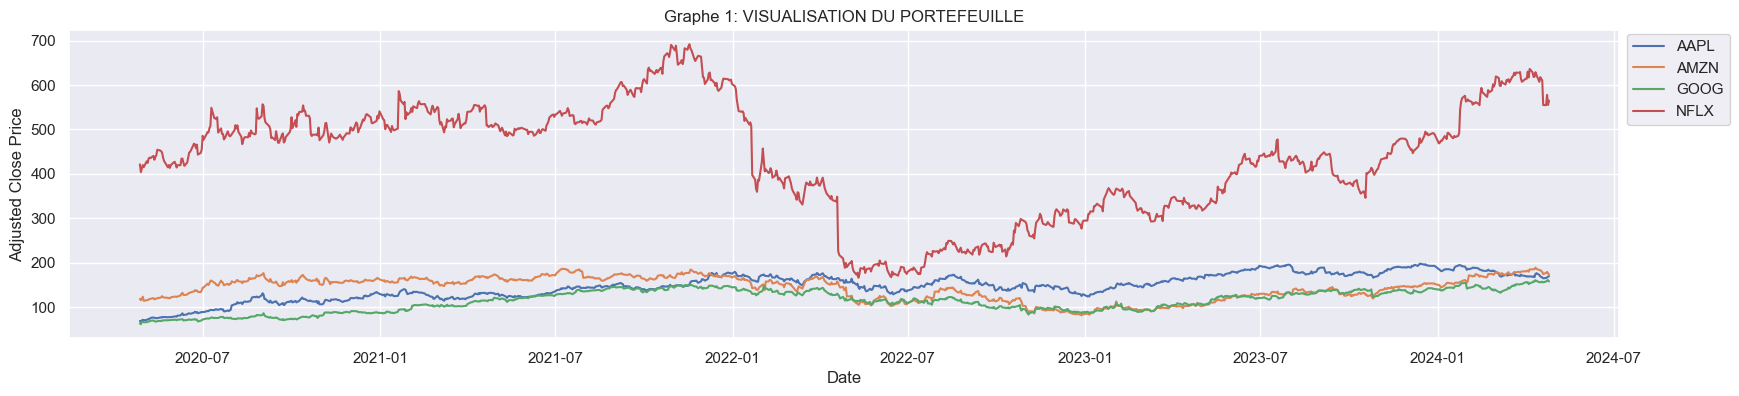

In [40]:
plt.figure(figsize=(20, 4))
plt.plot(stock_price)
plt.legend([c for c in stock_price.columns], loc='center left', bbox_to_anchor=(1, 0.84))
plt.title('Graphe 1: VISUALISATION DU PORTEFEUILLE')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

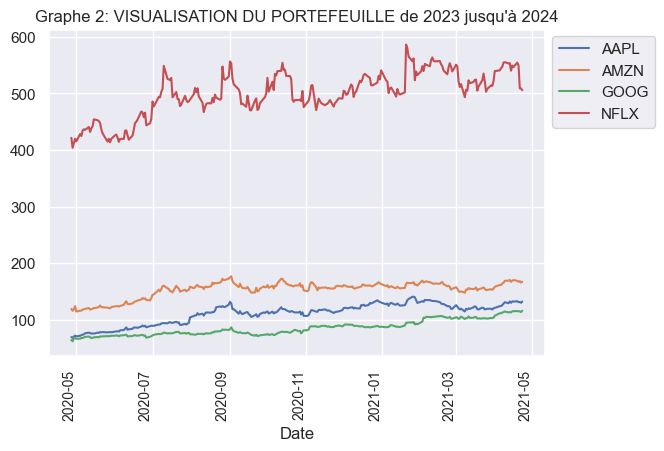

In [41]:
stock_price.loc['2020-04-25':'2021-04-25'].plot()
plt.legend([c for c in stock_price.columns],loc='center left', bbox_to_anchor=(1, 0.84))
plt.xticks(rotation='vertical',size=10)
plt.title("Graphe 2: VISUALISATION DU PORTEFEUILLE de 2023 jusqu'√† 2024");

## 4/ STATISTIQUES DESCRIPTIVE DU PORTEUFEUILLE


In [42]:
stock_price.describe().T

count        mean         std         min         25%         50%  \
symbol                                                                       
AAPL    1007.0  147.759508   28.511953   67.924751  128.884979  148.116486   
AMZN    1007.0  142.808397   26.515944   81.820000  122.443249  150.443497   
GOOG    1007.0  114.933835   24.204023   61.683498   95.450001  117.237999   
NFLX    1007.0  436.777130  126.725807  166.369995  343.925003  459.890015   

               75%         max  
symbol                          
AAPL    170.854012  197.857529  
AMZN    164.344750  189.050003  
GOOG    136.509499  161.100006  
NFLX    525.459992  691.690002

### coefficient de variation

Le coefficient de variation (CV) est une mesure de la variabilit√© relative d'un ensemble de donn√©es. Il est utilis√© pour comparer la dispersion des donn√©es par rapport √† leur valeur moyenne. Le coefficient de variation est souvent exprim√© en pourcentage et est calcul√© en divisant l'√©cart type par la moyenne, puis en multipliant le r√©sultat par 100.

Math√©matiquement, le coefficient de variation (CV) est d√©fini comme :

$ùê∂ùëâ =(ùúé/ùúá)√ó100$

O√π :

* œÉ est l'√©cart type (la mesure de la dispersion des donn√©es autour de la moyenne).
* Œº est la moyenne (la valeur moyenne des donn√©es).
Le coefficient de variation est utile lorsqu'on compare des ensembles de donn√©es qui ont des moyennes diff√©rentes. Il permet de normaliser la dispersion des donn√©es par rapport √† leur moyenne, ce qui permet des comparaisons plus significatives.

Voici quelques points √† retenir sur le coefficient de variation :

* Plus le coefficient de variation est faible, moins la dispersion des donn√©es par rapport √† leur moyenne est importante.
* Un coefficient de variation √©lev√© indique une grande dispersion des donn√©es par rapport √† leur moyenne.

In [43]:
def coefficient_of_variation(data_set):
    CV = (data_set.describe().iloc[2] / data_set.describe().iloc[1])
    return CV

In [44]:
print('='*25)
print('Coefficient de variation')
print('-'*25)
print(coefficient_of_variation(stock_price))
print('='*25)

Coefficient de variation
-------------------------
symbol
AAPL    0.192962
AMZN    0.185675
GOOG    0.210591
NFLX    0.290138
dtype: float64


In [45]:
def pct_plot(stocks_data):
    fig = plt.figure(figsize=(12,12))
    for i, column in enumerate(stocks_data.columns):
        plt.subplot(4,2,i+1)
        plt.plot(np.log(1 + stocks_data[column].pct_change()), color='r')
        plt.xticks(size=10)
        plt.title(column)
    
    fig.tight_layout()
    plt.show()

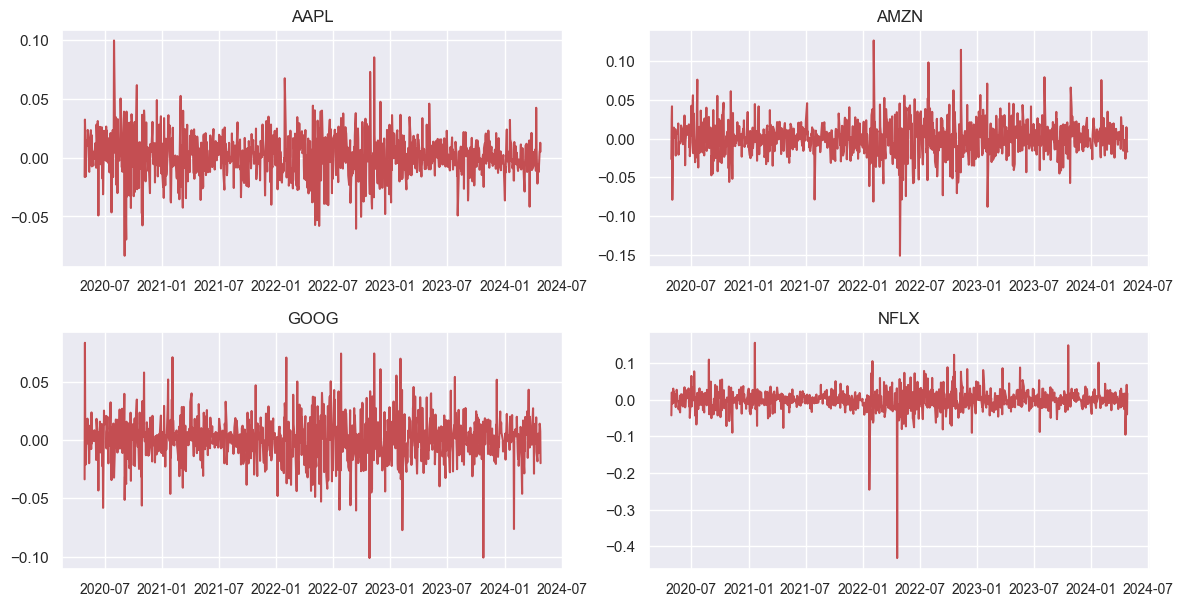

In [46]:
pct_plot(stock_price)

### Interpr√©tations
* AAPL:

La moyenne du cours de cl√¥ture ajust√© pour AAPL est d'environ 147.76 USD, avec une variabilit√© de ¬±28.51 USD par rapport √† cette moyenne (√©cart-type).
Le cours de cl√¥ture ajust√© le plus bas (min) est de 67.92 USD, tandis que le plus √©lev√© (max) est de 197.86 USD. La m√©diane (50e percentile) est de 148.12 USD.
Le coefficient de variation pour AAPL est d'environ 0.192962. Cela indique une variabilit√© relative des rendements d'environ 19.29% par rapport √† la moyenne. Cette stabilit√© relative peut √™tre interpr√©t√©e comme une bonne pr√©visibilit√© des rendements par rapport √† la moyenne.

* AMZN:

La moyenne du cours de cl√¥ture ajust√© pour AMZN est d'environ 142.81 USD, avec une variabilit√© de ¬±26.52 USD par rapport √† cette moyenne (√©cart-type).
Le cours de cl√¥ture ajust√© le plus bas (min) est de 81.82 USD, tandis que le plus √©lev√© (max) est de 189.05 USD. La m√©diane (50e percentile) est de 150.44 USD.
Le coefficient de variation pour AMZN est d'environ 0.185675. Cela indique une variabilit√© relative des rendements d'environ 18.57% par rapport √† la moyenne. Cette stabilit√© relative sugg√®re √©galement une bonne pr√©visibilit√© des rendements.

* GOOG:

La moyenne du cours de cl√¥ture ajust√© pour GOOG est d'environ 114.93 USD, avec une variabilit√© de ¬±24.20 USD par rapport √† cette moyenne (√©cart-type).
Le cours de cl√¥ture ajust√© le plus bas (min) est de 61.68 USD, tandis que le plus √©lev√© (max) est de 161.10 USD. La m√©diane (50e percentile) est de 117.24 USD.
Le coefficient de variation pour GOOG est d'environ 0.210591. Cela indique une variabilit√© relative des rendements d'environ 21.06% par rapport √† la moyenne. Bien que l√©g√®rement plus √©lev√© que les deux pr√©c√©dents, cela reste dans une plage raisonnable de stabilit√© relative.

* NFLX:

La moyenne du cours de cl√¥ture ajust√© pour NFLX est d'environ 436.78 USD, avec une variabilit√© de ¬±126.73 USD par rapport √† cette moyenne (√©cart-type).
Le cours de cl√¥ture ajust√© le plus bas (min) est de 166.37 USD, tandis que le plus √©lev√© (max) est de 691.69 USD. La m√©diane (50e percentile) est de 459.89 USD.
Le coefficient de variation pour NFLX est d'environ 0.290138. Cela indique une variabilit√© relative des rendements d'environ 29.01% par rapport √† la moyenne. Cette variabilit√© relative plus √©lev√©e sugg√®re une volatilit√© plus importante par rapport √† la moyenne, ce qui peut √™tre associ√© √† un risque plus √©lev√©.

Text(0.5, 1.0, 'BOX PLOT')

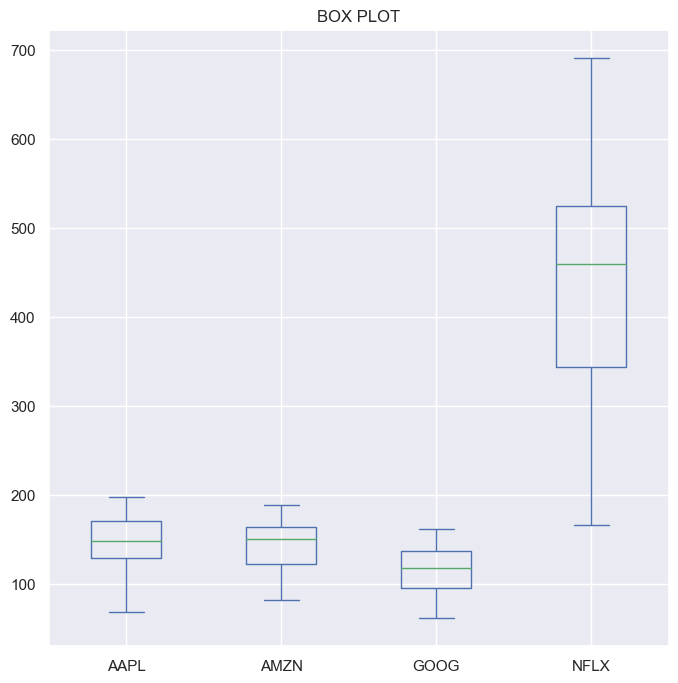

In [47]:
stock_price[['AAPL', 'AMZN', 'GOOG', 'NFLX']].plot.box(figsize=(8,8))
plt.title('BOX PLOT')

In [48]:
def metric(df):
    # skewness metric
    sk,p_vals = skewtest(df)
    skew_metric = skew(df)
    skewness = [skew_metric,sk,p_vals]
    s_stat = pd.DataFrame(data=skewness).T.round(3)
    s_stat.columns = ['skew','t-stat','p-value']
    s_stat.index = [c for c in df.columns]
    
    # kurtosis metric
    kurtos,p_valk = kurtosistest(df)
    kurtosis_metric = kurtosis(df)
    kurto = [kurtosis_metric,kurtos,p_valk]
    k_stat = pd.DataFrame(data=kurto).T.round(3)
    k_stat.columns = ['kurtosis','t-stat','p-value']
    k_stat.index = [c for c in df.columns]
    
    # affichage des resultats.
    print('')
    print('='*75)
    print('SKEWTEST RESULT: sous H0 "Distribution symetrique s = 0"')
    print('-'*75)
    print(s_stat.head())
    print('-'*75)
    
    print('')
    print('='*75)
    print('KURTOSISTEST RESULT: sous H0 "Distribution mesokuretique k = 3"')
    print('-'*75)
    print(k_stat.head())
    print('-'*75)
    
    #JB TEST
    JB =[]
    for c in df.columns:
        JB.append(list(stats.jarque_bera(df[c])))
    f = pd.DataFrame(JB).round(3)
    f.columns = ['t-stat','p-value']
    print('='*75)
    print('JARQUE - BERA TEST: sous H0 "Distribution suit une loi normale"')
    print('-'*75)
    print(f)
    print('-'*75)

In [49]:
metric(stock_price)


SKEWTEST RESULT: sous H0 "Distribution symetrique s = 0"
---------------------------------------------------------------------------
       skew  t-stat  p-value
AAPL -0.496  -6.141      0.0
AMZN -0.480  -5.953      0.0
GOOG -0.276  -3.539      0.0
NFLX -0.349  -4.427      0.0
---------------------------------------------------------------------------

KURTOSISTEST RESULT: sous H0 "Distribution mesokuretique k = 3"
---------------------------------------------------------------------------
      kurtosis  t-stat  p-value
AAPL    -0.186  -1.224    0.221
AMZN    -0.894 -11.285    0.000
GOOG    -1.040 -16.303    0.000
NFLX    -0.698  -7.107    0.000
---------------------------------------------------------------------------
JARQUE - BERA TEST: sous H0 "Distribution suit une loi normale"
---------------------------------------------------------------------------
   t-stat  p-value
0  42.818      0.0
1  72.155      0.0
2  58.176      0.0
3  40.868      0.0
---------------------------------

**Skewtest Result (Test d'asym√©trie) :**
- Les valeurs de skew (s) sont n√©gatives pour tous les symboles de stock, indiquant une asym√©trie n√©gative dans les distributions des donn√©es.
- Les p-values sont tr√®s proches de z√©ro, rejetant ainsi l'hypoth√®se nulle de sym√©trie.

**Kurtosistest Result (Test d'aplatissement) :**
- Les p-values sont tr√®s proches de z√©ro pour AMZN, GOOG et NFLX, rejetant ainsi l'hypoth√®se nulle de distribution mesokurtique.
- Pour AAPL, le p-value est de 0.221, ce qui ne permet pas de rejeter l'hypoth√®se nulle de distribution mesokurtique √† un niveau de signification de 5%.

**Jarque-Bera Test Result (Test de Jarque-Bera) :**
- Les p-values sont tr√®s proches de z√©ro pour tous les symboles de stock, indiquant des distributions non normales.



## Etude de correlation
La corr√©lation dans les secteurs de la finance et de l‚Äôinvestissement est une statistique qui mesure dans quelle mesure deux titres se d√©placent les uns par rapport aux autres. Elle est souvent utilis√©e pour √©valuer la relation lin√©aire entre les rendements de diff√©rents actifs financiers, tels que les actions.

Une corr√©lation positive indique que les deux titres ont tendance √† se d√©placer dans la m√™me direction, c'est-√†-dire que lorsque le prix d'un titre augmente, le prix de l'autre titre a √©galement tendance √† augmenter. En revanche, une corr√©lation n√©gative indique que les deux titres se d√©placent dans des directions oppos√©es.

Dans le contexte de l'investissement, l'√©tude de la corr√©lation entre diff√©rents titres peut aider les investisseurs √† diversifier leur portefeuille en choisissant des titres qui ont une corr√©lation faible ou n√©gative, r√©duisant ainsi le risque global du portefeuille. 

symbol      AAPL      AMZN      GOOG      NFLX
symbol                                        
AAPL    1.000000  0.008368  0.782459 -0.055403
AMZN    0.008368  1.000000  0.414641  0.811001
GOOG    0.782459  0.414641  1.000000  0.292947
NFLX   -0.055403  0.811001  0.292947  1.000000


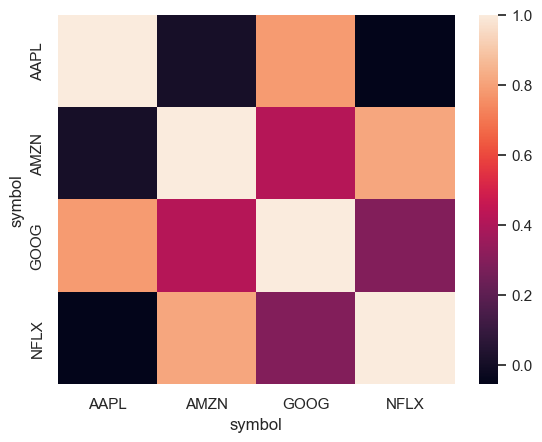

In [50]:
print(stock_price.corr())
sns.heatmap(stock_price.corr());

### Interpr√©tations
Les actifs pr√©sentent une forte corr√©lation positive entre eux, avec des coefficients de corr√©lation tous sup√©rieurs √† 90 %, √† l'exception de la corr√©lation entre AAPL et NFLX qui est de 87 %. En particulier, la corr√©lation entre AMZN et NFLX est tr√®s √©lev√©e, autour de 97 %. Cette forte corr√©lation sugg√®re que les prix de ces actions ont tendance √† √©voluer dans la m√™me direction.

Cependant, malgr√© cette forte corr√©lation, les actifs ne sont pas parfaitement corr√©l√©s entre eux. Cette l√©g√®re variation dans les niveaux de corr√©lation peut √™tre interpr√©t√©e comme une diversification mod√©r√©e du portefeuille. En d'autres termes, bien que les actifs soient fortement corr√©l√©s, il existe encore des diff√©rences dans leurs mouvements de prix qui permettent de r√©duire le risque global du portefeuille.

Par cons√©quent, on peut conclure que notre portefeuille est relativement diversifi√©, ce qui signifie que le risque global du portefeuille est inf√©rieur au risque de chaque actif individuel qui le compose. Cela peut offrir une certaine protection contre les fluctuations de march√© et contribuer √† une gestion plus efficace du risque dans l'ensemble du portefeuille d'investissement.


### Transformation necessaire √† l'analyse

La transformation consiste √† calculer les rendements logarithmiques des prix des actions. Cela est fait pour plusieurs raisons :

1/ Stabilisation de la variance : Les rendements logarithmiques ont une variance plus stable dans le temps, facilitant ainsi l'analyse statistique.

2/ Interpr√©tation simplifi√©e : Les rendements logarithmiques sont interpr√©t√©s comme des taux de croissance, ce qui est plus intuitif pour les investisseurs.

3/ Lin√©arisation : Cette transformation permet de lin√©ariser les relations entre les variables, facilitant l'application de techniques d'analyse statistique.

4/ R√©duction des biais : Les rendements logarithmiques r√©duisent les biais potentiels associ√©s aux prix des actions, am√©liorant ainsi la qualit√© de l'analyse.

In [51]:
log = np.log(1 + stock_price.pct_change())
log = log.dropna()

Text(0.5, 1.0, 'BOX PLOT')

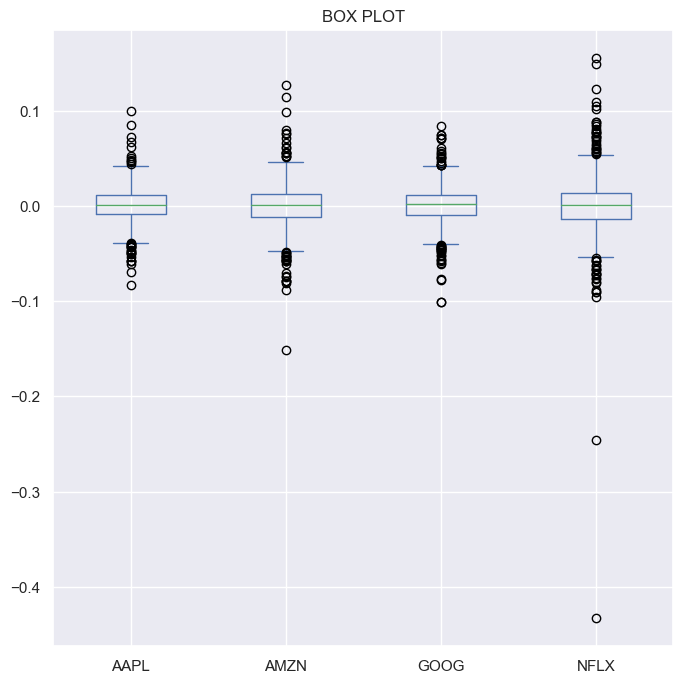

In [52]:
log[['AAPL', 'AMZN', 'GOOG', 'NFLX']].plot.box(figsize=(8,8))
plt.title('BOX PLOT')

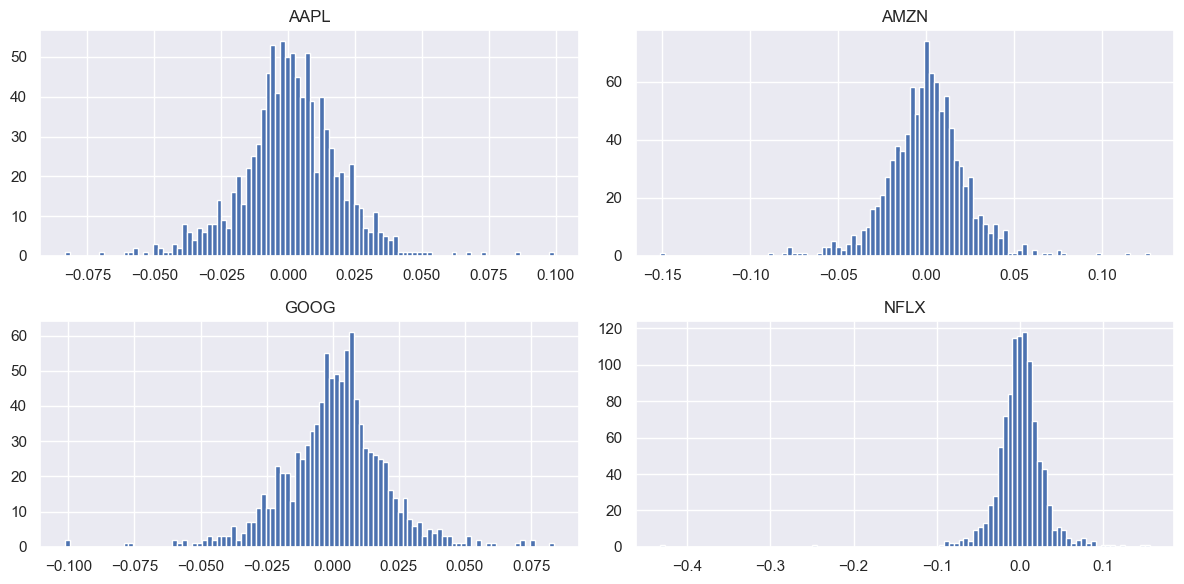

In [53]:
log.hist(bins=100,figsize=(12,6))
plt.tight_layout()

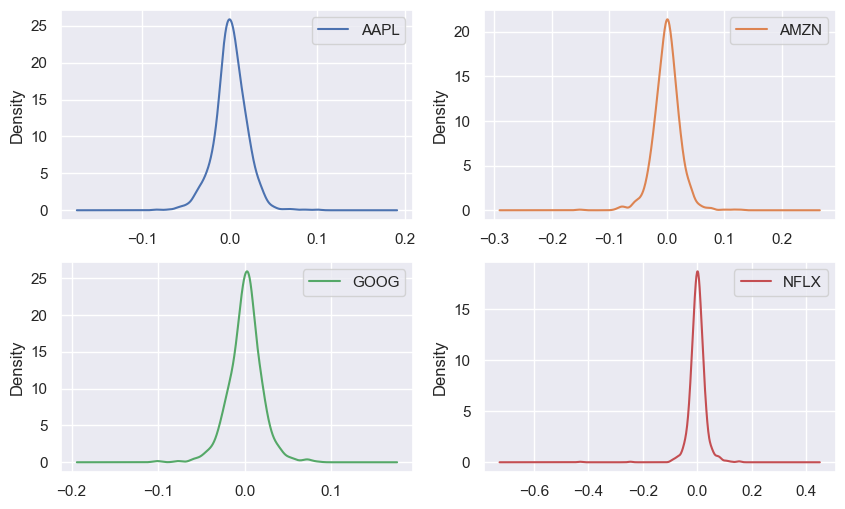

In [54]:
log.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(10, 6))
plt.show()

### Interpr√©tation
Apr√®s application d'un filtre de diff√©rentiation d'ordre 1 les actifs constituants notre portefeuille semble s'ajuster √† une loi normale ce qui nous donne l'autorisation de proced√© √† une analyse moyenne-variance proposer par la docteur H. Markowitz, pour identifier l'allocaton optimal (r√©partition optimale du budget) qui nous permettra de soit maximiser le ratio de sharpe, ou soit de minimiser le risque associ√© √† notre portefeuille.



### Ratio de Sharpe
Le ratio de Sharpe, d√©velopp√© par William F. Sharpe, est une mesure permettant d'√©valuer le rendement d'un investissement par rapport √† son niveau de risque. Il indique le rendement moyen exc√©dentaire par unit√© de risque total. La volatilit√©, mesur√©e par l'√©cart-type des rendements, est utilis√©e comme mesure du risque.

**Exemple concret d'application du ratio de Sharpe :** Imaginez un investisseur envisageant d'ajouter des fonds de couverture √† son portefeuille d'actions et d'obligations. Si le portefeuille a rapport√© 15 % au cours de l'ann√©e pr√©c√©dente, avec un taux sans risque de 3,5 % et une volatilit√© de 12 %, le ratio de Sharpe serait de 95,8 %, calcul√© comme (15 % - 3,5 %) / 12 %.

### Les Rendements Attendus du Portefeuille
Les rendements attendus du portefeuille font r√©f√©rence aux gains ou pertes r√©alis√©s sur un portefeuille de placements contenant plusieurs types de placements sur une p√©riode donn√©e. C'est la moyenne des variations en pourcentage des cours des actions du portefeuille.

### L'√âcart Type du Portefeuille
La volatilit√© est mesur√©e comme l'√©cart type des rendements des actions constituant le portefeuille. Cette mesure indique la dispersion des rendements autour de la moyenne. La racine carr√©e de la variance du portefeuille donne l'√©cart type.

### Poids de chaque Actif
Le poids de chaque actif dans le portefeuille repr√©sente la proportion de l'investissement total qui lui est allou√©e. Ces poids d√©terminent la r√©partition des fonds dans le portefeuille.

### Remarque
Ces m√©triques sont essentielles pour comprendre et √©valuer les caract√©ristiques d'un portefeuille d'investissement. Elles seront utiles pour identifier les portefeuilles optimaux selon diff√©rentes strat√©gies d'investissement, en suivant les principes de la th√©orie des portefeuilles.


## 5/ OPTIMISATION DU PORTEFEUILLE : SIMULATION DE MONTE CARLO

Dans cette simulation de Monte Carlo, nous g√©n√©rons al√©atoirement des poids pour chaque actif financier, puis nous utilisons ces poids pour construire diff√©rents portefeuilles. Pour chaque portefeuille ainsi construit, nous calculons ensuite les m√©triques de performance telles que le rendement, la volatilit√© et le ratio de Sharpe. Ces m√©triques nous aident √† √©valuer la performance de chaque portefeuille simul√©.

En fin de compte, cette approche nous permet d'explorer une large gamme de combinaisons d'allocation d'actifs possibles et d'√©valuer leurs performances potentielles. Cela nous aide √† prendre des d√©cisions √©clair√©es lors de la construction de portefeuilles d'investissement en identifiant ceux qui pr√©sentent le meilleur √©quilibre entre rendement et risque.

In [56]:
# initialistation des commposent
np.random.seed(0)
nb_portfolio = 10000
# matrice de metrique des poids (allocation optimal) pour chaque iteration
all_weights = np.zeros((nb_portfolio, len(stock_price.columns)))

# matrice de metrique du rendements esp√©r√© possible du portefeuille pour chaque iteration
ret_arr = np.zeros(nb_portfolio)

# matrice de metrique de la volatilit√© possible du portefeuille pour chaque iteration
vol_arr = np.zeros(nb_portfolio)

# matrice de metrique du ration de sharpe possible du portefeuille pour chaque iteration.
sharpe_arr = np.zeros(nb_portfolio)

#calcul du log_return
log_return = np.log(1 + stock_price.pct_change())

# debut de la simulation
for ind in range(nb_portfolio):

    # calcul des poids
    weights = np.array(np.random.random(len(stock_price.columns)))
    weights = weights / np.sum(weights)

    # ajouter des poids caluler dans la matrice de metrique des poids
    all_weights[ind, :] = weights.round(3)

    # calcul du rendement espere du portefeuille
    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)

    # calcul de la volatilit√© du portefeuille
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # calcul du ratio de sharp.
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

# creation d'un cadre de donn√©es de r√©f√©rence pour les metriques
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

simulations_df = pd.DataFrame(data=simulations_data).T

# assignation des colonnes.
simulations_df.columns = ['Returns','Volatility','Sharpe Ratio','Portfolio Weights']

# conserver la caractere numerique de nos metrique
simulations_df = simulations_df.infer_objects()

# affichage des resultats.
print('')
print('='*75)
print('SIMULATIONS RESULT:')
print('-'*75)
print(simulations_df)
print('-'*75)


SIMULATIONS RESULT:
---------------------------------------------------------------------------
       Returns  Volatility  Sharpe Ratio             Portfolio Weights
0     0.152877    0.292704      0.522293   [0.228, 0.297, 0.25, 0.226]
1     0.134147    0.316376      0.424012  [0.177, 0.269, 0.182, 0.372]
2     0.177095    0.279231      0.634226  [0.361, 0.144, 0.297, 0.198]
3     0.144502    0.300012      0.481653   [0.344, 0.56, 0.043, 0.053]
4     0.129677    0.321915      0.402829  [0.008, 0.333, 0.311, 0.348]
...        ...         ...           ...                           ...
9995  0.135911    0.305594      0.444744  [0.221, 0.372, 0.135, 0.272]
9996  0.131474    0.316806      0.414999  [0.246, 0.294, 0.093, 0.367]
9997  0.152658    0.298889      0.510753   [0.301, 0.195, 0.19, 0.314]
9998  0.167021    0.288754      0.578419  [0.372, 0.131, 0.222, 0.275]
9999  0.152248    0.298664      0.509762   [0.342, 0.202, 0.146, 0.31]

[10000 rows x 4 columns]
-------------------------

In [29]:
# Option maximisation du ratio de sharp.
max_sharpe_ratio = simulations_df[['Returns', 'Volatility', 'Sharpe Ratio']].loc[simulations_df['Sharpe Ratio'].idxmax()]

# Option minimisation de la volatilit√©.
min_volatility = simulations_df[['Returns', 'Volatility', 'Sharpe Ratio']].loc[simulations_df['Volatility'].idxmin()]

# Allocation optimal
allocation = pd.DataFrame(data=all_weights)
allocation.columns = ['AAPL', 'AMZN', 'GOOG', 'NFLX']
alloc_max_sr = allocation.loc[simulations_df['Sharpe Ratio'].idxmax()]
alloc_min_vol = allocation.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*35)
print('MAX SHARPE RATIO')
print('*'*35)
print(max_sharpe_ratio,'\n')
print('*'*35)
print("Allocation optimal")
print(alloc_max_sr)
print('-'*35)
print("\n")
print('='*35)
print('MIN VOLATILITY')
print('*'*35)
print(min_volatility,'\n')
print('*'*35)
print("Allocation optimal")
print(alloc_min_vol)
print('-'*35)


MAX SHARPE RATIO
***********************************
Returns         0.224971
Volatility      0.269409
Sharpe Ratio    0.835054
Name: 812, dtype: float64 

***********************************
Allocation optimal
AAPL    0.549
AMZN    0.005
GOOG    0.442
NFLX    0.004
Name: 812, dtype: float64
-----------------------------------


MIN VOLATILITY
***********************************
Returns         0.214726
Volatility      0.268294
Sharpe Ratio    0.800340
Name: 1473, dtype: float64 

***********************************
Allocation optimal
AAPL    0.531
AMZN    0.041
GOOG    0.388
NFLX    0.040
Name: 1473, dtype: float64
-----------------------------------


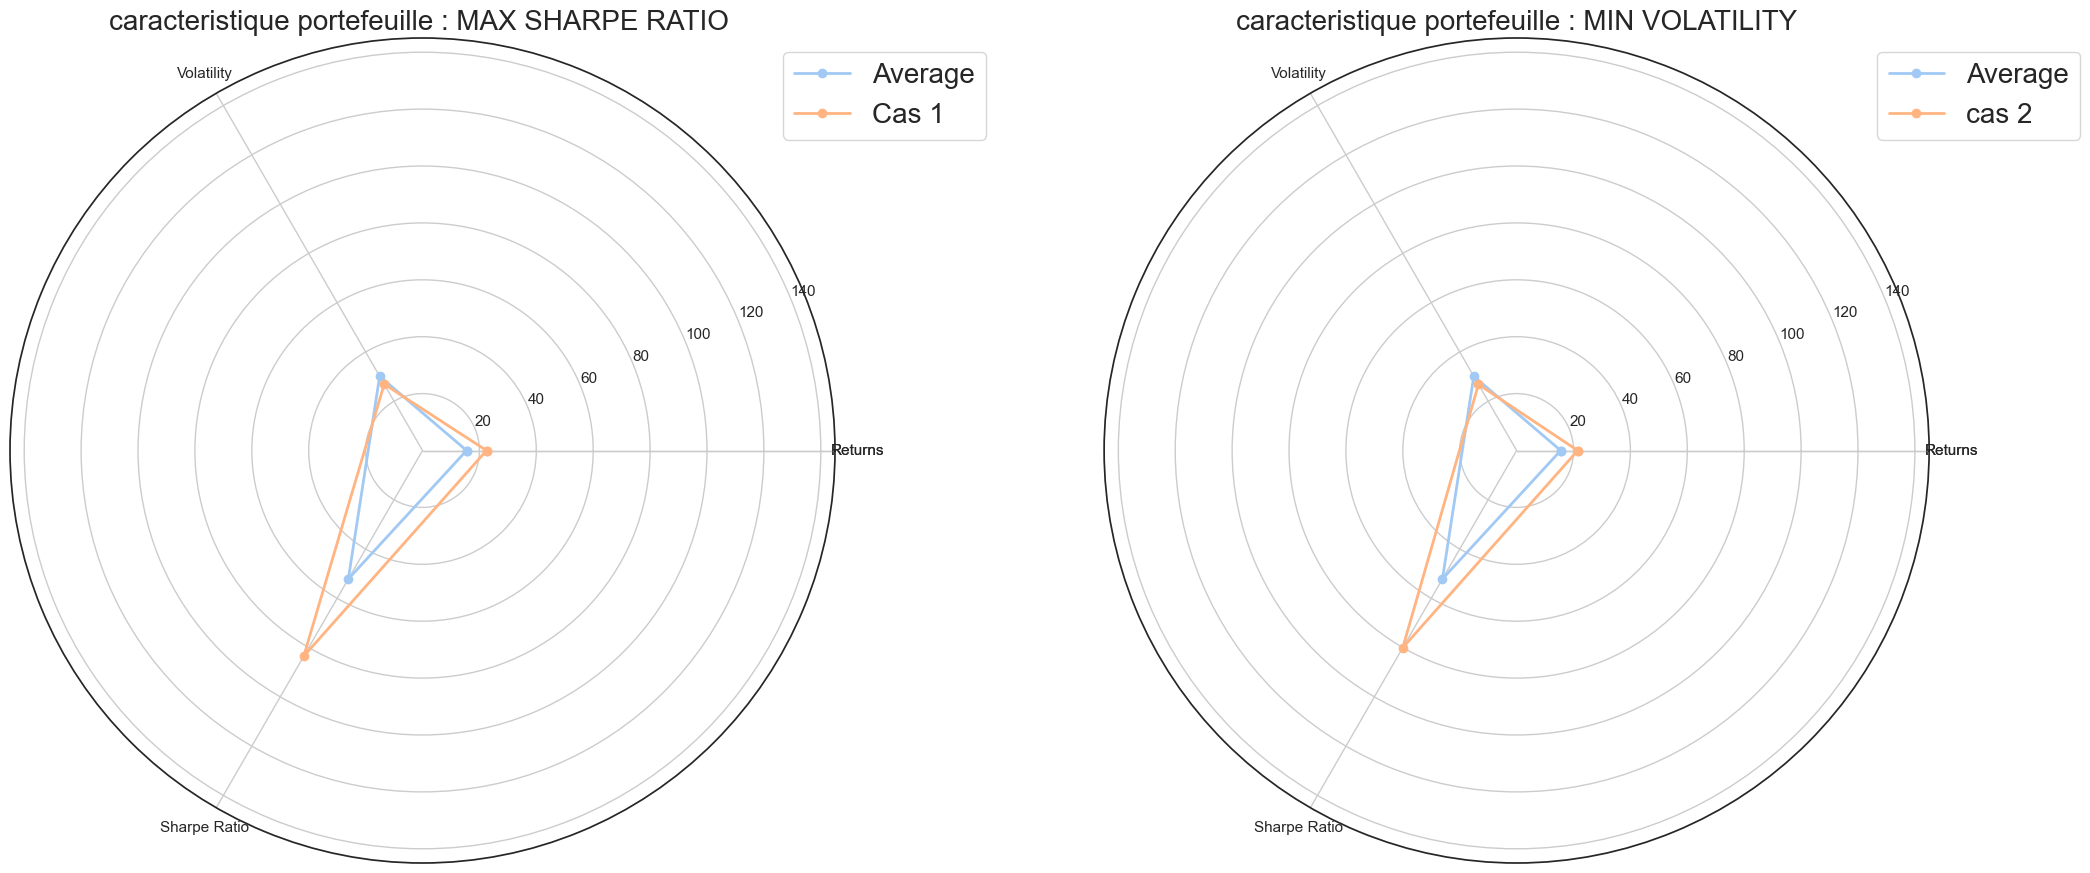

In [58]:
# creation d'une table resumant le caracteristique d'optimalit√©

dat = pd.concat([max_sharpe_ratio,min_volatility],axis = 1) *100
dat.columns = ['MAX SHARPE RATIO ', 'MIN VOLATILITY']
lab = ['caracteristique portefeuille : MAX SHARPE RATIO ', 'caracteristique portefeuille : MIN VOLATILITY']
dat['index'] = ['Returns', 'Volatility', 'Sharpe Ratio']
dat.set_index('index')

# implematation de element du graphique

labels = np.array(['Returns', 'Volatility', 'Sharpe Ratio'])
dataLenth = 3 

val_mean    = []
for c in ['Returns', 'Volatility', 'Sharpe Ratio']:
    val_mean.append(simulations_df[c].mean()*100)
    
datatype = ['caracteristique MAX SHARPE RATIO ', 'caracteristique MIN VOLATILITY']
for i in range(2):
    datatype[i] = list(dat.reset_index().T.drop(index=['index','level_0']).iloc[i])
    datatype[i] = np.concatenate((datatype[i], [datatype[i][0]]))

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
val_mean  = np.concatenate((val_mean, [val_mean[0]]))
labels = np.concatenate((labels, [labels[0]]))

sns.set(style="white", palette="pastel")
fig = plt.figure(figsize=(40,75))
for i in range(2):
    ax = fig.add_subplot(6, 3, i+1, polar=True)
    ax.plot(angles, val_mean, 'o-', linewidth=2, label='Average') 
    ax.plot(angles, datatype[i], 'o-', linewidth=2, label=['Cas 1','cas 2'][i])
    ax.set_thetagrids(angles * 180/np.pi, labels) 
    ax.set_ylim(0,145)  
    ax.set_title(lab[i], fontsize=20)
    ax.legend(fontsize=20, bbox_to_anchor=(1.2, 1))

* Ratio de Sharpe √©lev√© : Les deux portefeuilles ont des ratios de Sharpe plus √©lev√©s que la moyenne, ce qui indique un rendement ajust√© au risque plus attractif.
* Rendement √©lev√© : Les deux portefeuilles pr√©sentent des rendements plus √©lev√©s que la moyenne, ce qui est un indicateur positif pour les investisseurs.
* Volatilit√© r√©duite : Les deux portefeuilles ont une volatilit√© plus faible que la moyenne, ce qui signifie qu'ils sont moins sensibles aux fluctuations de march√© et offrent une certaine stabilit√©.

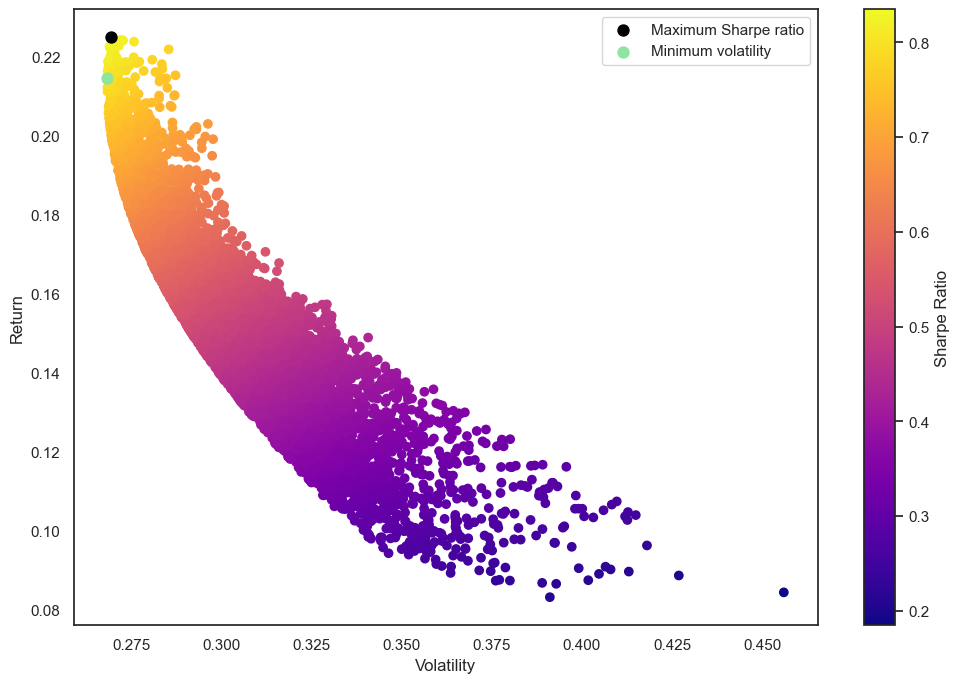

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(simulations_df['Volatility'],simulations_df['Returns'],
            c = simulations_df['Sharpe Ratio'],cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Ajout du RS max
max_sr_ret = simulations_df['Returns'][simulations_df['Sharpe Ratio'].idxmax()]
max_sr_vol = simulations_df['Volatility'][simulations_df['Sharpe Ratio'].idxmax()]
min_vol_vol = simulations_df['Volatility'][simulations_df['Volatility'].idxmin()]
min_vol_ret = simulations_df['Returns'][simulations_df['Volatility'].idxmin()]

plt.scatter(max_sr_vol,max_sr_ret,marker='.',c='black',s=250,edgecolors='black',label='Maximum Sharpe ratio')
plt.scatter(min_vol_vol,min_vol_ret,marker='.',c='g',s=250,edgecolors='g',label='Minimum volatility')
plt.legend();

Sur ce graphique, l'axe horizontal repr√©sente le niveau de risque, tandis que l'axe vertical repr√©sente le niveau de rendement attendu associ√© √† chaque portefeuille. Il repr√©sente graphiquement chacun les portefeuilles g√©n√©r√©s de mani√®re al√©atoire suite √† la simulation de Monte-Carlo. En particulier, il met en √©vidence les portefeuilles ayant les caract√©ristiques correspondant √† la maximisation du ratio de Sharpe et ceux correspondant √† la minimisation de la volatilit√©.

<span style="color: #2660B2">REFERENCE</span>
==

``SOURCE ECRITE``
* INVESTING PORTFOLIO MANAGEMENT [investopedia](https://www.investopedia.com/terms/m/modernportfoliotheory.asp)
* Deep Learning for Portfolio Optimisation [Oxford-Man Institute of Quantitative Finance](https://arxiv.org/pdf/2005.13665v1.pdf#page=9)
* Portfolio Optimization with Python using Efficient Frontier with Practical Examples [ML+](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-exampl)
* Note de cours du [Ma√Ætre de conf√©rences de sciences √©conomiques, Ali Skalli](http://skalli.u-paris2.fr/enseignements.php)

``SOURCE VIDEO``
* Portfolio Allocation, No Short Sales, and Solver [podcast resources](https://archive.org/search.php?query=creator%3A%22phil-davies%40uiowa.edu%22)